### Importing libraries we will need

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\lglv\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Loading the dataset Algerian

In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
df = pd.read_csv(url, header = 1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Removing not needed rows

In [11]:
df.day.astype(int)

ValueError: invalid literal for int() with base 10: 'Sidi-Bel Abbes Region Dataset'

In [12]:
(df['day'] == 'Sidi-Bel Abbes Region Dataset').value_counts()

False    245
True       1
Name: day, dtype: int64

In [13]:
drop_row = df['day'] == 'Sidi-Bel Abbes Region Dataset'

In [14]:
df1 = df.drop(index = df[drop_row].index)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [15]:
df1.day.astype(int)

ValueError: invalid literal for int() with base 10: 'day'

In [16]:
(df1['day'] == 'day').value_counts()

False    244
True       1
Name: day, dtype: int64

In [17]:
drop_row_2 = df['day'] == 'day'

In [18]:
df2 = df1.drop(index = df[drop_row_2].index)
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [19]:
df2.RH.astype(int)

AttributeError: 'DataFrame' object has no attribute 'RH'

### Striping columns with white spaces

In [20]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [21]:
df2.columns = df.columns.str.strip()
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [22]:
df2.DC.astype(float)

ValueError: could not convert string to float: '14.6 9'

### Replacing a not float value for a float one

In [23]:
df2['DC'] = df2['DC'].replace('14.6 9', '14.6')
df2.DC.astype(float)

0       7.6
1       7.6
2       7.1
3       6.9
4      14.2
       ... 
241    44.5
242     8.0
243     7.9
244    15.2
245    16.5
Name: DC, Length: 244, dtype: float64

In [24]:
df2.FWI.astype(float)

ValueError: could not convert string to float: 'fire   '

### Filling null values in Classes column by the left values

In [25]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [26]:
df2 = df2.fillna(method = 'pad', axis = 1)
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [27]:
df2['Classes'].value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

### Replacing string value in the column FWI for a desired one

In [28]:
df2['FWI'] = df2['FWI'].replace('fire   ', '10.4')
df2.FWI.astype(float)

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
241    6.5
242    0.0
243    0.2
244    0.7
245    0.5
Name: FWI, Length: 244, dtype: float64

### Removing trailing whitespaces from column Classes

In [29]:
df2['Classes'] = df2['Classes'].str.strip()
df2['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [31]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### Encoding data from  object to numeric data

In [32]:
df3 = df2.astype({'day':'int',
                 'month':'int',
                 'year':'int',
                 'Temperature':'int',
                 'RH':'int',
                 'Ws':'int',
                 'Rain':'float',
                 'FFMC':'float',
                 'DMC':'float',
                 'DC':'float',
                 'ISI':'float',
                 'BUI':'float',
                 'FWI':'float'})

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 22.9+ KB


In [34]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [35]:
df3['year'].value_counts()

2012    244
Name: year, dtype: int64

### Removing the column year that have 2012 in avery row

In [36]:
df3.drop(df3.columns[[2]], axis = 1, inplace = True)
df3

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [37]:
df3['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

### Mapping the Classes to binary class

In [38]:
df3['Classes_map'] = df3['Classes'].map({'not fire':0, 'fire':1})
df3

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_map
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [39]:
df3.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Classes_map    0
dtype: int64

In [40]:
df3.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Classes_map'],
      dtype='object')

In [41]:
num_fetures = [fea for fea in df3.columns if df3[fea].dtype != 'O']
num_fetures

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes_map']

### Ploting the distribution for every column

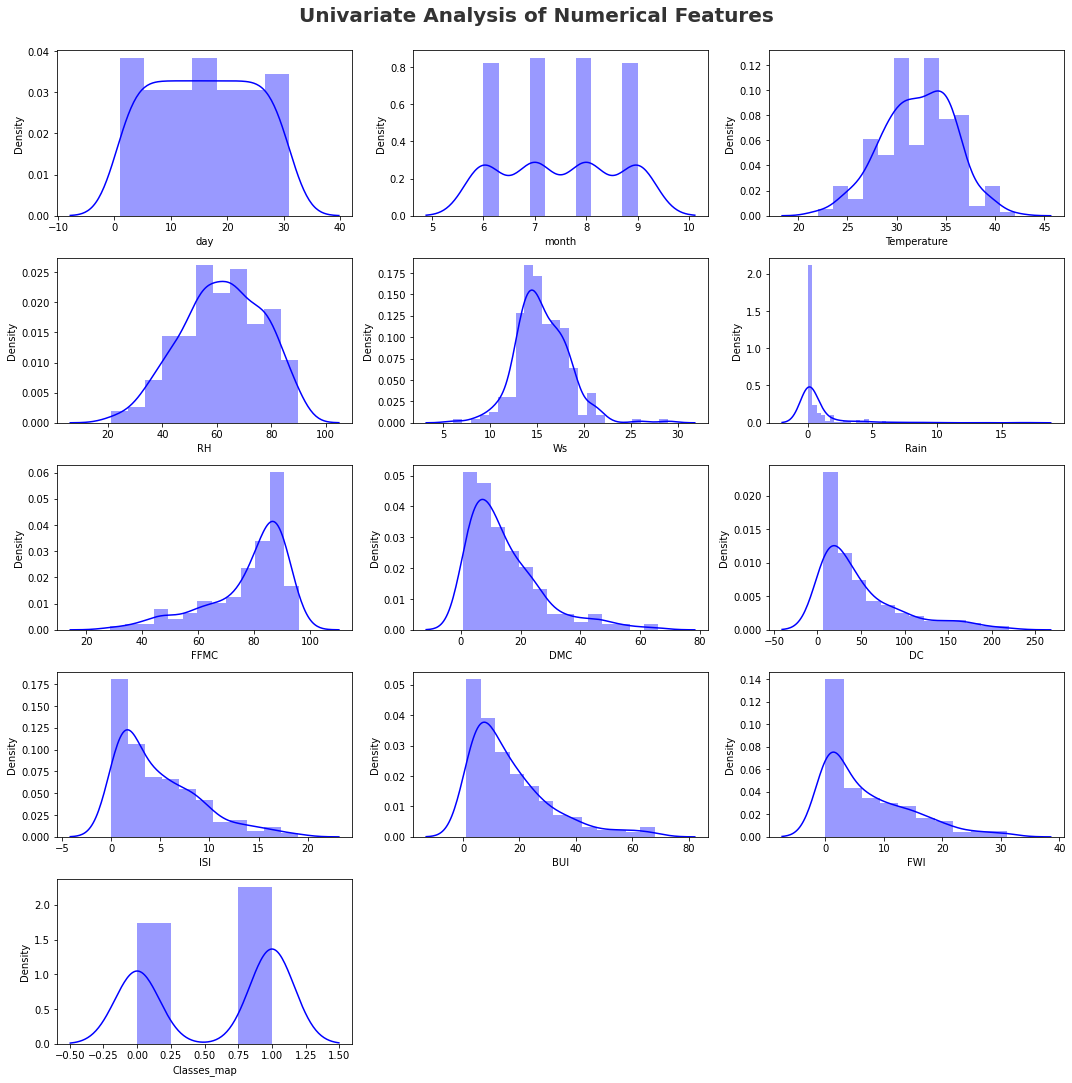

In [42]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_fetures)):
    plt.subplot(5, 3, i+1)
    #sns.kdeplot(x=df3[num_fetures[i]],shade=True, color='b')
    sns.distplot(x=df3[num_fetures[i]], color='b')
    plt.xlabel(num_fetures[i])
    plt.tight_layout()

 * We can see that there are some skewness in the data

In [43]:
df3['DC'].describe()

count    244.000000
mean      49.288115
std       47.619662
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

### Now we´ll see the outliers 

<AxesSubplot:>

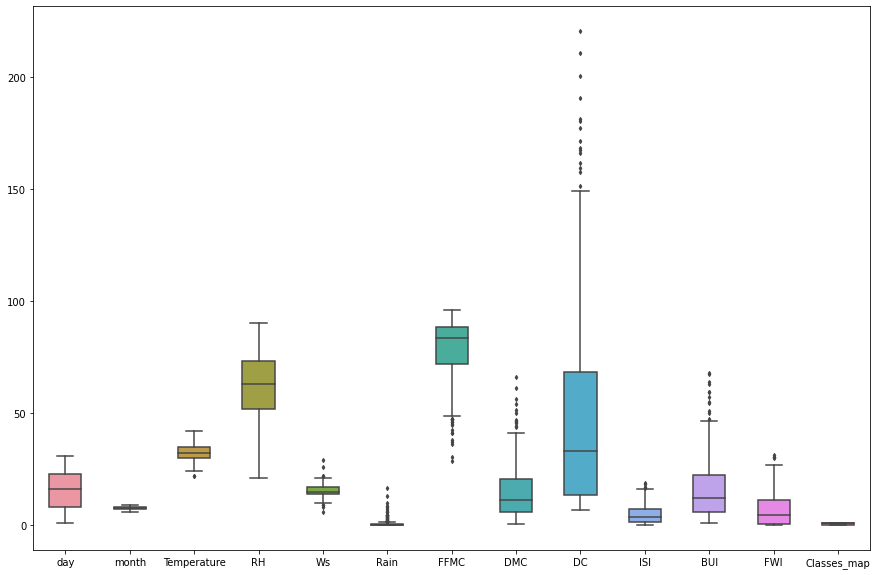

In [44]:
#plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df3, width = 0.5, ax = ax, fliersize = 3)

In [45]:
df3.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_map
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.049180,0.565574
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.428366,0.496700
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,1.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### Handling outliers

#### Temperature

In [46]:
q = df3['Temperature'].quantile(0.005)
q

22.43

In [47]:
df3.shape

(244, 14)

In [48]:
df_cleaned = df3[df3['Temperature']>q]
df_cleaned.shape

(242, 14)

#### Ws

In [49]:
q_upp = df3['Ws'].quantile(0.991)
q_upp

22.0

In [50]:
df_cleaned_2 = df_cleaned[df_cleaned['Ws']<q_upp]
df_cleaned_2.shape

(239, 14)

In [51]:
q_low = df3['Ws'].quantile(0.015)
q_low

9.645

In [52]:
df_cleaned = df3[df3['Ws']>q_low]
df_cleaned.shape

(240, 14)

#### Rain

In [53]:
q = df_cleaned_2['Rain'].quantile(0.98)
q

5.848000000000002

In [54]:
df_cleaned_2 = df_cleaned_2[df_cleaned_2['Rain']<q]
df_cleaned_2.shape

(234, 14)

#### FFMC

In [55]:
q = df_cleaned_2['FFMC'].quantile(0.035)
q

45.372

In [56]:
df_cleaned_2 = df_cleaned_2[df_cleaned_2['FFMC']>q]
df_cleaned_2.shape

(225, 14)

#### DMC

In [57]:
q = df_cleaned_2['DMC'].quantile(0.97)
q

46.712

In [58]:
df_cleaned_2 = df_cleaned_2[df_cleaned_2['DMC']<q]
df_cleaned_2.shape

(218, 14)

#### DC

In [59]:
q = df_cleaned_2['DC'].quantile(0.96)
q

149.87199999999999

In [60]:
df_cleaned_2 = df_cleaned_2[df_cleaned_2['DC']<q]
df_cleaned_2.shape

(209, 14)

#### BUI

In [61]:
q = df_cleaned_2['BUI'].quantile(0.97)
q

39.331999999999994

In [62]:
df_cleaned_2 = df_cleaned_2[df_cleaned_2['BUI']<q]
df_cleaned_2.shape

(202, 14)

<AxesSubplot:>

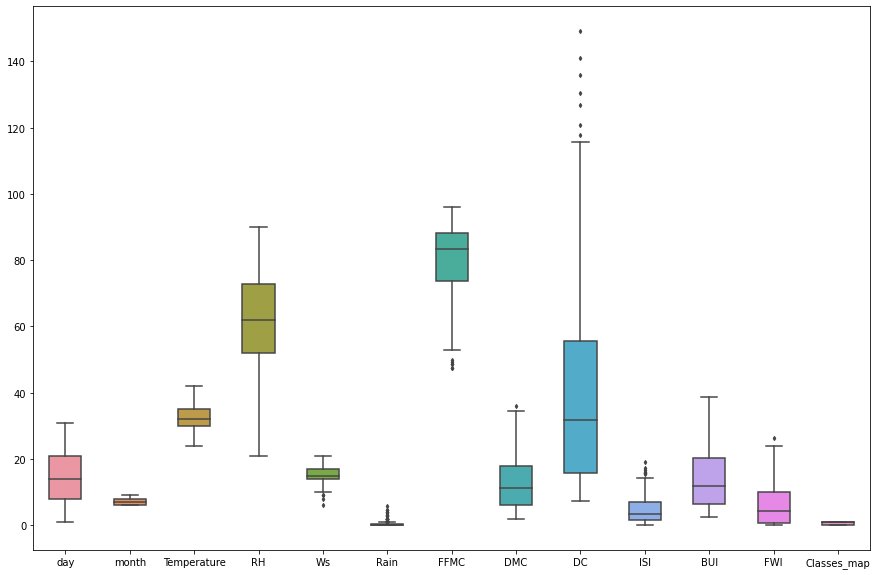

In [63]:
#plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df_cleaned_2, width = 0.5, ax = ax, fliersize = 3)

# Checking if target is balanced 

In [64]:
df_cleaned_2['Classes_map'].value_counts()

1    116
0     86
Name: Classes_map, dtype: int64

In [65]:
df_cleaned_2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_map
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1


<AxesSubplot:ylabel='Classes_map'>

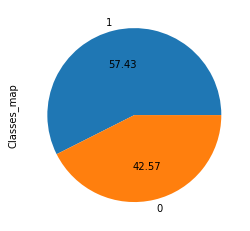

In [66]:
# Show pie plot (Approach 1)
df_cleaned_2['Classes_map'].value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x1f328e1aeb8>,
 [Text(-0.2542939801204336, 1.070203051609604, 'fire'),
  Text(0.2542939801204337, -1.070203051609604, 'not fire')],
 [Text(-0.1387058073384183, 0.5837471190597839, '57.43'),
  Text(0.13870580733841836, -0.5837471190597839, '42.57')])

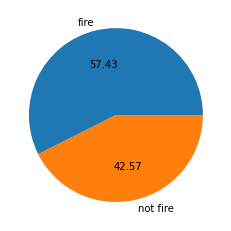

In [67]:
# Show pie plot (Approach 2)

fig1, ax1 = plt.subplots()
ax1.pie(df_cleaned_2['Classes'].value_counts(), autopct='%.2f', labels=df_cleaned_2['Classes'].value_counts().index)

# Logistic Regression with inbalanced target data

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [94]:
X = df_cleaned_2.iloc[:,:-2]
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...
239,24,9,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4
240,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [95]:
y = df_cleaned_2.iloc[:,-1]
y

0      0
1      0
4      0
5      1
6      1
      ..
239    0
240    0
241    1
244    0
245    0
Name: Classes_map, Length: 202, dtype: int64

In [96]:
std_scal = StandardScaler()

In [97]:
X_scaled = std_scal.fit_transform(X)
X_scaled

array([[-1.6449473 , -1.25905049, -0.99832847, ..., -0.86519685,
        -1.17245451, -0.95006457],
       [-1.52602126, -1.25905049, -0.99832847, ..., -0.94172718,
        -1.11780598, -0.96676719],
       [-1.16924314, -1.25905049, -1.58798447, ..., -0.89070696,
        -1.11780598, -0.95006457],
       ...,
       [ 1.32820369,  1.39943243, -0.70350047, ..., -0.04887333,
         0.30305587,  0.05209231],
       [ 1.6849818 ,  1.39943243, -2.47246846, ..., -0.76315641,
        -0.9866495 , -0.91665934],
       [ 1.80390784,  1.39943243, -2.47246846, ..., -0.89070696,
        -1.01943862, -0.95006457]])

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)
print('The X_train shape is:', X_train.shape)
print('The X_test shape is:', X_test.shape)
print('The y_train shape is:', y_train.shape)
print('The y_test shape is:', y_test.shape)

The X_train shape is: (161, 12)
The X_test shape is: (41, 12)
The y_train shape is: (161,)
The y_test shape is: (41,)


In [137]:
lr = LogisticRegression()

In [138]:
lr.fit(X_train, y_train)

LogisticRegression()

In [139]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [141]:
acuracy = accuracy_score(y_test, y_pred)
acuracy

0.926829268292683

In [142]:
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.96      0.92      0.94        24

    accuracy                           0.93        41
   macro avg       0.92      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



[[16  1]
 [ 2 22]]
Confusion Matrix: 




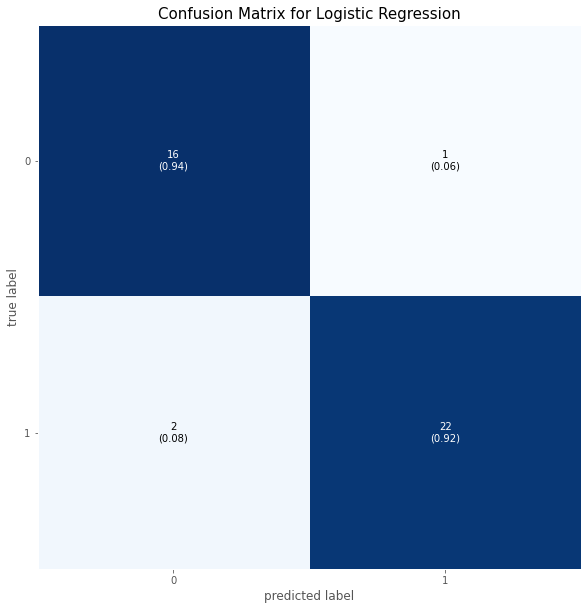

In [143]:
conf_mtx = confusion_matrix(y_test, y_pred)
print(conf_mtx)
print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# Handling inmbalenced target

## Random Undersampling

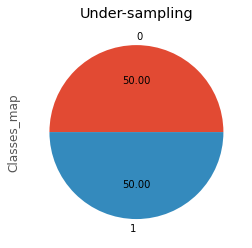

In [144]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_scaled, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [145]:
y_res.value_counts()

0    86
1    86
Name: Classes_map, dtype: int64

### Logistic Regression with random undersampling

In [146]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=42)
print('The X_train_res shape is:', X_train_res.shape)
print('The X_test_res shape is:', X_test_res.shape)
print('The y_train_res shape is:', y_train_res.shape)
print('The y_test_res shape is:', y_test_res.shape)

The X_train_res shape is: (137, 12)
The X_test_res shape is: (35, 12)
The y_train_res shape is: (137,)
The y_test_res shape is: (35,)


In [147]:
lr_res = LogisticRegression()

In [148]:
lr_res.fit(X_train_res, y_train_res)

LogisticRegression()

In [149]:
y_pred_res = lr_res.predict(X_test_res)
y_pred_res

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [150]:
accuracy_res = accuracy_score(y_test_res, y_pred_res)
accuracy_res

0.9714285714285714

In [151]:
cls_rep_res = classification_report(y_test_res, y_pred_res)
print(cls_rep_res)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



[[18  0]
 [ 1 16]]
Confusion Matrix: 




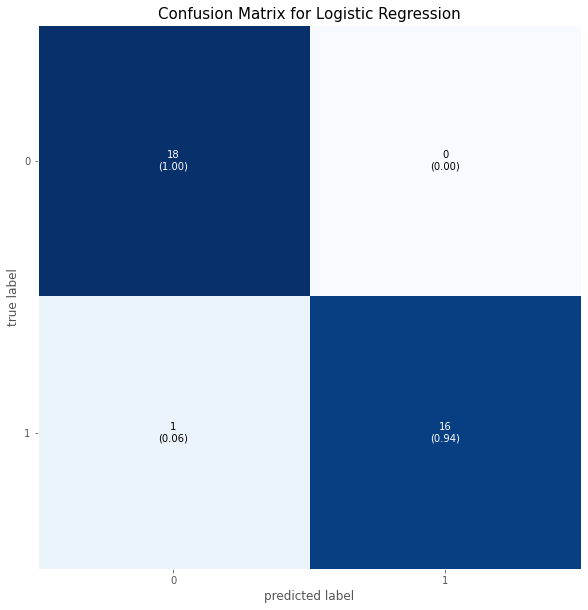

In [152]:
from mlxtend.plotting import plot_confusion_matrix
conf_mtx_res = confusion_matrix(y_test_res, y_pred_res)
print(conf_mtx_res)
print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test_res, y_pred_res)
plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

## Random Oversampling

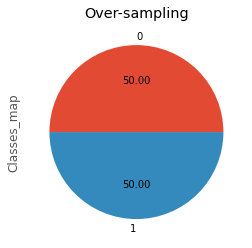

In [153]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res_over, y_res_over = ros.fit_resample(X_scaled, y)

ax = y_res_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [154]:
y_res_over.value_counts()

0    116
1    116
Name: Classes_map, dtype: int64

### Logistic Regression with random oversampling

In [181]:
X_train_overs, X_test_overs, y_train_overs, y_test_overs = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state=42)
print('The X_train_overs shape is:', X_train_overs.shape)
print('The X_test_overs shape is:', X_test_overs.shape)
print('The y_train_overs shape is:', y_train_overs.shape)
print('The y_test_overs shape is:', y_test_overs.shape)

The X_train_overs shape is: (185, 12)
The X_test_overs shape is: (47, 12)
The y_train_overs shape is: (185,)
The y_test_overs shape is: (47,)


In [182]:
lr_overs = LogisticRegression()

In [183]:
lr_overs.fit(X_train_overs, y_train_overs)

LogisticRegression()

In [184]:
y_pred_overs = lr_overs.predict(X_test_overs)
y_pred_overs

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [185]:
accuracy_overs = accuracy_score(y_test_overs, y_pred_overs)
accuracy_overs

0.9148936170212766

In [186]:
cls_rep_overs = classification_report(y_test_overs, y_pred_overs)
print(cls_rep_overs)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.96      0.89      0.92        27

    accuracy                           0.91        47
   macro avg       0.91      0.92      0.91        47
weighted avg       0.92      0.91      0.92        47



[[19  1]
 [ 3 24]]
Confusion Matrix: 




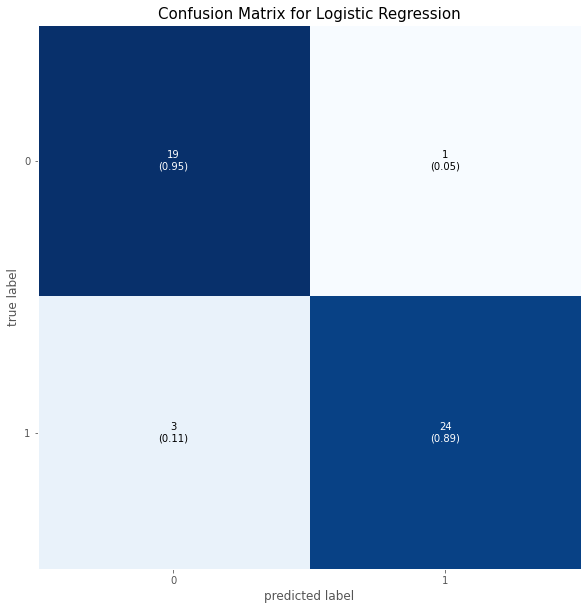

In [187]:
conf_mtx_overs = confusion_matrix(y_test_overs, y_pred_overs)
print(conf_mtx_overs)
print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test_overs, y_pred_overs)
plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# Storage of models

In [188]:
# Import libary pickle
import pickle

In [189]:
# Writing different model files to file

with open( 'std_scal.plk', 'wb') as f:
    pickle.dump(std_scal,f)
with open( 'lr.plk', 'wb') as f:
    pickle.dump(lr,f)
with open( 'lr_res.plk', 'wb') as f:
    pickle.dump(lr_res,f)
with open( 'lr_overs.plk', 'wb') as f:
    pickle.dump(lr_overs,f)
with open('rus.plk', 'wb') as f:
    pickle.dump(rus,f)
with open( 'ros.plk', 'wb') as f:
    pickle.dump(ros,f)  

# Open models

In [190]:
with open( 'std_scal.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='std_scal.plk'>

In [191]:
with open( 'lr.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='lr.plk'>

In [192]:
with open( 'lr_res.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='lr_res.plk'>

In [193]:
with open( 'lr_overs.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='lr_overs.plk'>

In [194]:
with open('rus.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='rus.plk'>

In [195]:
with open( 'ros.plk', 'rb') as f:
    pickle.load(f)
f

<_io.BufferedReader name='ros.plk'>

# Conclusion

##### After feature engeenering and scaling, the output feture 'Classes', is not balanced (116: fire, 86: not fire)
###  The accuracy for this model was: 0.93

##### With random undersampling, resample all classes but the minority class, it yielded (86: fire, 86: not fire)
### The accuracy for this model was: 0.97

##### With random oversampling, resample all classes but the majority class, it yielded (116: fire, 116: not fire)
### The accuracy for this model was: 0.91

## That's why we recomend to use the undersamplig model for predictions.


In [ ]:
https://docs.google.com/document/d/1dQdyJq9G3IGU-BaE4VyrxTk2LZZiyPFJ47or9A-Y4fk/edit

In [ ]:
https://docs.google.com/forms/d/e/1FAIpQLSeCob4z7rrWCy86YKAHFXjUGMvV6H40wXVlY8jdXnqNSvGiTQ/viewform

In [ ]:
https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection